In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set()

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.shape

(150, 5)

In [4]:
versicolor_petal_length = df[df["species"] == "versicolor"]["petal_length"]

In [24]:
versicolor_petal_width = df[df["species"]=="versicolor"]["petal_width"]

In [5]:
mean_length_vers = np.mean(versicolor_petal_length)
mean_length_vers

4.26

In [18]:
median_length_vers = np.median(versicolor_petal_length)
median_length_vers

4.3499999999999996

### Note : Mean is impacted by outliers but median is largely not

In [6]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.
Instructions

    Plot the percentiles as red diamonds on the ECDF. 
    Pass the x and y co-ordinates - ptiles_vers and percentiles/100 - as positional arguments and specify the marker='D', color='red' and linestyle='none' keyword arguments. 
    The argument for the y-axis - percentiles/100 has been specified for you.
    Display the plot.


In [12]:
def ecdf(data):
    x = np.sort(data)
    n = len(x)
    y = np.arange(1,n+1)/float(n)
    return x,y

In [13]:
x_vers,y_vers = ecdf(versicolor_petal_length)

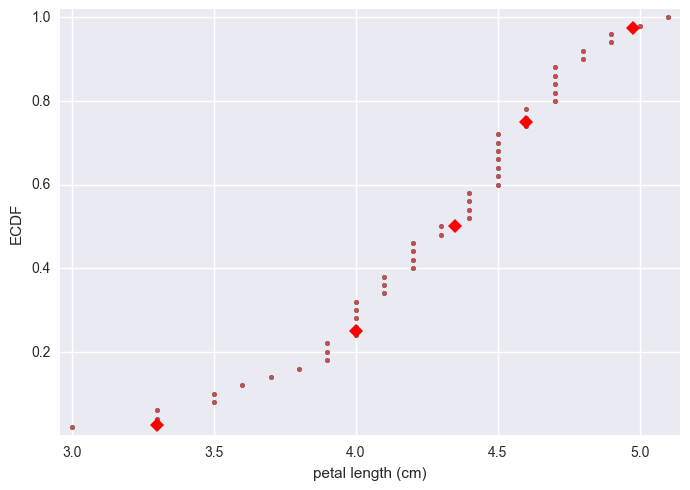

In [16]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


Box-and-whisker plot
100xp

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using df.head() to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:

_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)

_ = plt.xlabel('region')

_ = plt.xlabel('percent of vote for Obama')

In the IPython Shell, you can use sns.boxplot? or help(sns.boxplot) for more details on how to make box plots using seaborn.
Instructions

    The set-up is exactly the same as for the bee swarm plot; you just call sns.boxplot() with the same keyword arguments as you would sns.swarmplot(). The x-axis is 'species' and y-axis is 'petal length (cm)'.
    Don't forget to label your axes!
    Display the figure using the normal call.


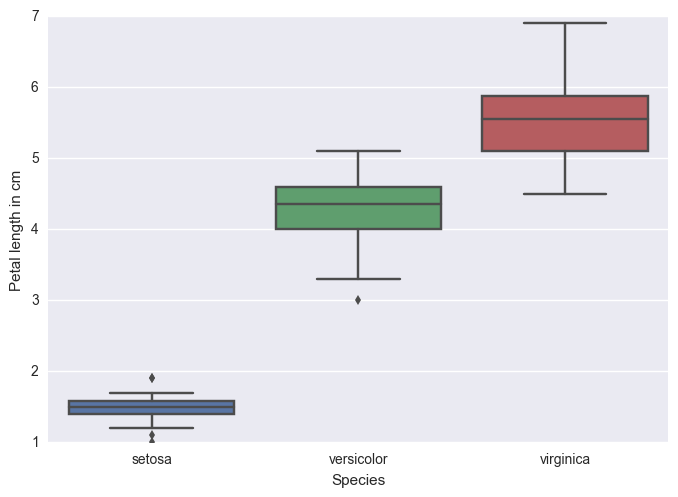

In [17]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y = 'petal_length', data = df)

# Label the axes
_ = plt.xlabel("Species")
_ = plt.ylabel("Petal length in cm")


# Show the plot
plt.show()

# Computing the variance


It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.


    Create an array called differences that is the difference between the petal lengths (versicolor_petal_length) and the mean petal length. The variable versicolor_petal_length is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
    Square each element in this array. For example, x**2 squares each element in the array x. Store the result as diff_sq.
    Compute the mean of the elements in diff_sq using np.mean(). Store the result as variance_explicit.
    Compute the variance of versicolor_petal_length using np.var(). Store the result as variance_np.
    Print both variance_explicit and variance_np in one print call to make sure they are consistent.


In [20]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)



# Print the results
print(variance_np, variance_np)

(0.21640000000000012, 0.21640000000000012)


### The standard deviation and the variance
100xp

As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.


    Compute the variance of the data in the versicolor_petal_length array using np.var().
    Print the square root of this value.
    Compute the standard deviation of the data in the versicolor_petal_length array using np.std() and print the result.


In [22]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.465188133985
0.465188133985


### Scatter plots


When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:

_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

_ = plt.xlabel('total votes (thousands)')

_ = plt.ylabel('percent of vote for Obama')


    Use plt.plot() with the appropriate keyword arguments to make a scatter plot of versicolor petal length (x-axis) versus petal width (y-axis). The variables versicolor_petal_length and versicolor_petal_width are already in your namespace. Do not forget to use the marker='.' and linestyle='none' keyword arguments.
    Specify 2% margins so no data are cut off.
    Label the axes.
    Display the plot.


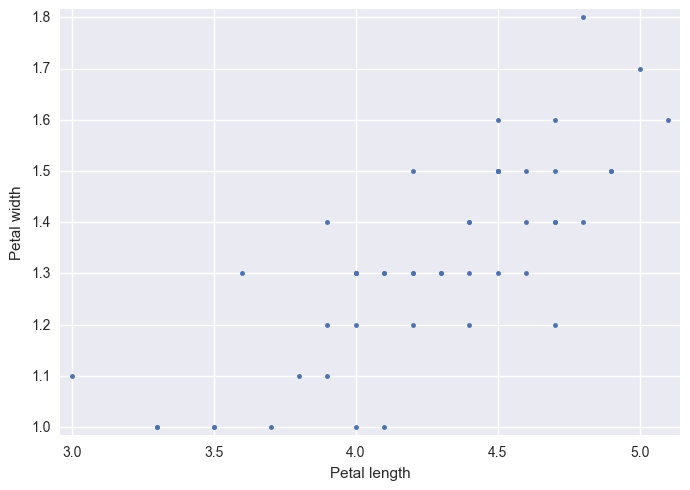

In [25]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker = ".", linestyle='none')


# Set margins
plt.margins(0.02)

# Label the axes
plt.xlabel("Petal length")
plt.ylabel("Petal width")


# Show the result
plt.show()

### Computing the covariance

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.


    Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
    Print the covariance matrix.
    Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
    Print the covariance.


In [27]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print covariance_matrix

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0][1]

# Print the length/width covariance
print petal_cov

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]
0.0731020408163


### Computing the Pearson correlation coefficient


As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.


    Define a function with signature pearson_r(x, y).
        Use np.corrcoef() to compute the correlation matrix of x and y (pass them to np.corrcoef() in that order).
        The function returns entry [0,1] of the correlation matrix.
    Compute the Pearson correlation between the data in the arrays versicolor_petal_length and versicolor_petal_width. Assign the result to r.
    Print the result.


In [28]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print (r)

0.786668088523
